In [1]:
from data import import_dataset, load_dataset, FORUM, PROLIFIC, DATASETS


import_dataset(DATASETS)

Importing dataset: anno
Importing dataset: anno
Importing dataset: prolific
Importing dataset: prolific
Importing dataset: prolific


In [2]:
from data import load_dataset, split_dataset

d = load_dataset()

split_dataset(
    d["text"], d["self"], test_size=0.2, stratify=d["source"], random_state=125
)

In [3]:
from data.sampling import load_split_dataset, LABELS_TRAIN
from classifiers.sner import (
    create_train_file,
    create_config_file,
    train_sner,
)

labels_train = load_split_dataset(LABELS_TRAIN)

create_config_file()
create_train_file(labels_train)

# train_sner()

In [4]:
from classifiers.sner import classify_sentences
from data.sampling import load_split_dataset, TEXT_TEST

text_test = load_split_dataset(TEXT_TEST)
# classify_sentences(text_test)

In [5]:
from classifiers.sner import (
    sentences_to_token_df,
    load_classification_result,
)
from data.sampling import load_split_dataset, LABELS_TEST

results = load_classification_result()

labels_test = load_split_dataset(LABELS_TEST)
solution = sentences_to_token_df(labels_test)

In [6]:
from data import TORE_LABELS
from sklearn.metrics import precision_score

p = precision_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

p

/Users/bockstaller/MA/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5797716296179111

In [7]:
from sklearn.metrics import recall_score

r = recall_score(
    solution["label"], results["label"], average="macro", labels=TORE_LABELS
)

r

/Users/bockstaller/MA/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.4121903848670214

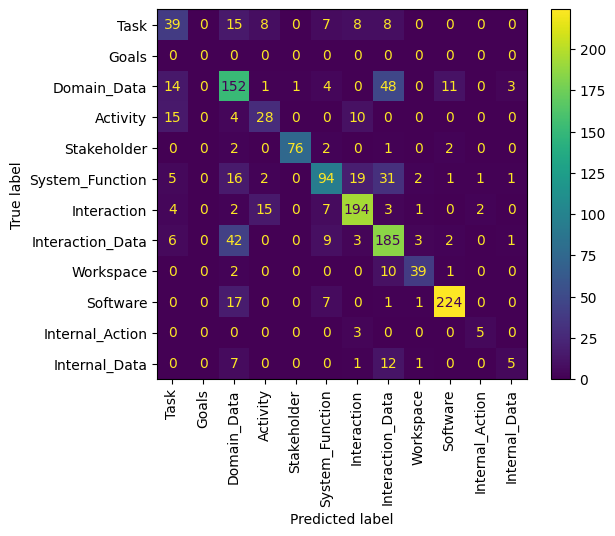

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    solution["label"],
    results["label"],
    labels=TORE_LABELS,
    xticks_rotation="vertical",
)